### This notebook generates figures that allow for comparison of accuracies and runtimes between SPORF and sklearn RF classifier using the OpenML CC18 and 100 suites under default parameter conditions

### Load in dataset properties

In [16]:
import openml
import numpy as np
import pandas as pd

###################### obtain the benchmark suites ######################
set_CC18 = openml.study.get_suite('OpenML-CC18')
set_100 = openml.study.get_suite('OpenML100')

dimen_CC18 = []
dimen_100 = []

for task_id in set_CC18.tasks:  # iterate over all tasks
    try:
        task = openml.tasks.get_task(task_id)  # download the OpenML task
        features_CC18, targets_CC18 = task.get_X_and_y()  # get the data
        dimen_CC18.append(np.shape(features_CC18))
    except:
        print('Error in OpenML CC-18 dataset ' + str(task_id))

for task_id in set_100.tasks:  # iterate over all tasks
    try:
        task = openml.tasks.get_task(task_id)  # download the OpenML task
        features_100, targets_100 = task.get_X_and_y()  # get the data
        dimen_100.append(np.shape(features_100))
    except:
        print('Error in OpenML 100 dataset ' + str(task_id))
        
########################## read in accuracies ###########################
acc_SPORF_CC18 = open('SPORF_accuracies_CC-18.txt','r')

SPORF_taskID_CC18 = []
SPORF_name_CC18 = []
SPORF_accuracy_CC18 = []
SPORF_time_CC18 = []
    
for line in acc_SPORF_CC18:
    fields = line.split(',')
    SPORF_taskID_CC18.append(fields[0])
    SPORF_name_CC18.append(fields[1])
    SPORF_accuracy_CC18.append(float(fields[2]))
    SPORF_time_CC18.append(fields[3])

# print(np.shape(SPORF_accuracy_CC18)) <- WORKS!

acc_SPORF_100 = open('SPORF_accuracies_100.txt','r')

SPORF_taskID_100 = []
SPORF_name_100 = []
SPORF_accuracy_100 = []
SPORF_time_100 = []

for line in acc_SPORF_100:
    fields = line.split(',')
    SPORF_taskID_100.append(fields[0])
    SPORF_name_100.append(fields[1])
    SPORF_accuracy_100.append(float(fields[2]))
    SPORF_time_100.append(fields[3])

# print(np.shape(SPORF_accuracy_100)) <- WORKS!

acc_skRF_CC18 = open('sklearnRF_accuracies_CC-18.txt','r')

skRF_taskID_CC18 = []
skRF_name_CC18 = []
skRF_accuracy_CC18 = []
skRF_time_CC18 = []

for line in acc_skRF_CC18:
    fields = line.split(',')
    skRF_taskID_CC18.append(fields[0])
    skRF_name_CC18.append(fields[1])
    skRF_accuracy_CC18.append(float(fields[2]))
    skRF_time_CC18.append(fields[3])

# print(np.shape(skRF_accuracy_CC18)) <- WORKS!

acc_skRF_100 = open('sklearnRF_accuracies_100.txt','r')

skRF_taskID_100 = []
skRF_name_100 = []
skRF_accuracy_100 = []
skRF_time_100 = []

for line in acc_skRF_100:
    fields = line.split(',')
    skRF_taskID_100.append(fields[0])
    skRF_name_100.append(fields[1])
    skRF_accuracy_100.append(float(fields[2]))
    skRF_time_100.append(fields[3])

# print(np.shape(skRF_accuracy_100)) <- WORKS!

Error in OpenML 100 dataset 34536


### Find accuracy differences

In [17]:
acc_diffs_CC18 = []
acc_diffs_100 = []

for i in range(len(SPORF_accuracy_CC18)):
    acc_diffs_CC18.append(SPORF_accuracy_CC18[i]-skRF_accuracy_CC18[i])
    
for i in range(len(SPORF_accuracy_100)):
    acc_diffs_100.append(SPORF_accuracy_100[i]-skRF_accuracy_100[i])
    
print(np.shape(acc_diffs_CC18))
print(np.shape(acc_diffs_100))

# account for error in one OpenML 100 dataset (index 89)
# dimen_100 = np.delete(dimen_100,[89],axis=0)
print(np.shape(dimen_100))

(72,)
(99,)
(99, 2)


### Plot accuracy differences (scatterplot with marker radius propotional to difference magnitude)

RF was better for 11 datasets in CC18
RF was better for 17 datasets in 100


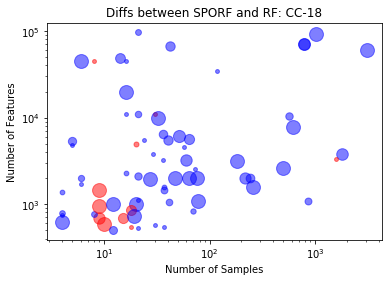

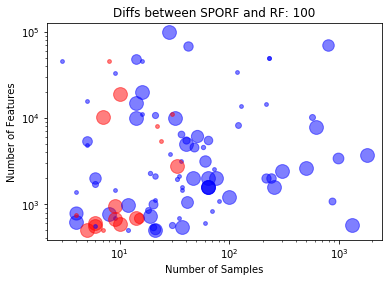

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# limiting greatest and least values for figure marker sizes
Dacc_diffs_CC18 = acc_diffs_CC18
Dacc_diffs_100 = acc_diffs_100

a = np.mean(acc_diffs_CC18)-0.01
b = np.mean(acc_diffs_CC18)+0.01

for i in range(len(acc_diffs_CC18)):
    if acc_diffs_CC18[i] > 0:
        if acc_diffs_CC18[i] < (a):
            Dacc_diffs_CC18[i] = a
        if acc_diffs_CC18[i] > (b):
            Dacc_diffs_CC18[i] = b
    else:
        if acc_diffs_CC18[i] > (a*-1):
            Dacc_diffs_CC18[i] = a*-1
        if acc_diffs_CC18[i] < (b*-1):
            Dacc_diffs_CC18[i] = b*-1

c = np.mean(acc_diffs_100)-0.01
d = np.mean(acc_diffs_100)+0.01

for i in range(len(acc_diffs_100)):
    if acc_diffs_100[i] > 0:
        if acc_diffs_100[i] < (c):
            Dacc_diffs_100[i] = c
        if acc_diffs_100[i] > (d):
            Dacc_diffs_100[i] = d
    else:
        if acc_diffs_100[i] > (c*-1):
            Dacc_diffs_100[i] = c*-1
        if acc_diffs_100[i] < (d*-1):
            Dacc_diffs_100[i] = d*-1

# plot figures and count datasets where RF performs better (red)
            
red_CC18 = 0
plt.figure()
for i in range(len(Dacc_diffs_CC18)):
    if Dacc_diffs_CC18[i] > 0:
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'bo',MarkerSize = (Dacc_diffs_CC18[i])*500,alpha=0.5)
    else:
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'ro',MarkerSize = (Dacc_diffs_CC18[i])*-500,alpha=0.5)
        red_CC18 += 1
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.title('Diffs between SPORF and RF: CC-18')

print('RF was better for ' + str(red_CC18) + ' datasets in CC18')
        
red_100 = 0
plt.figure()
for i in range(len(Dacc_diffs_100)):
    if Dacc_diffs_100[i] > 0:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'bo',MarkerSize = (Dacc_diffs_100[i])*500,alpha=0.5)
    else:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'ro',MarkerSize = (Dacc_diffs_100[i])*-500,alpha=0.5)
        red_100 += 1
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.title('Diffs between SPORF and RF: 100')
        
print('RF was better for ' + str(red_100) + ' datasets in 100')

### Plot Accuracies

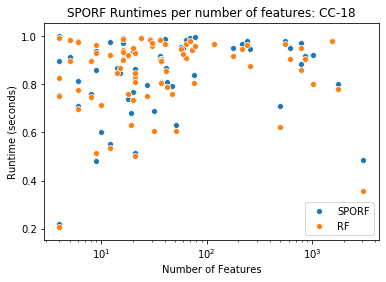

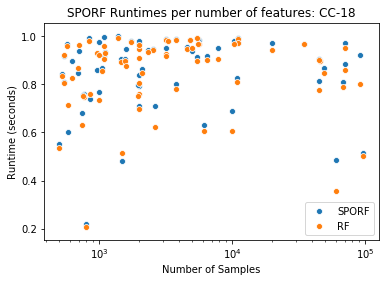

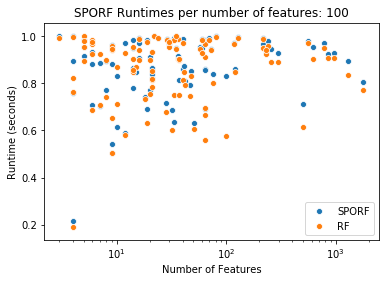

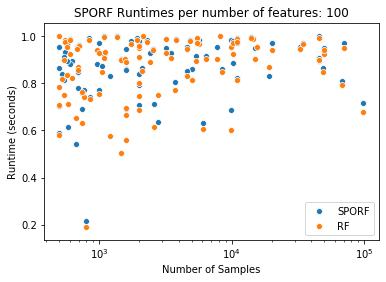

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

## OpenML CC18 Accuracies

# SPORF accuracies
n_features_SPORF_CC18 = []
n_samples_SPORF_CC18 = []

for i in range(len(SPORF_accuracy_CC18)):
    n_features_SPORF_CC18.append(dimen_CC18[i][1])
    n_samples_SPORF_CC18.append(dimen_CC18[i][0])

n_features_SPORF_CC18 = np.vstack((n_features_SPORF_CC18, SPORF_accuracy_CC18))
n_samples_SPORF_CC18 = np.vstack((n_samples_SPORF_CC18, SPORF_accuracy_CC18))

# RF accuracies
n_features_RF_CC18 = []
n_samples_RF_CC18 = []

for i in range(len(SPORF_time_CC18)):
    n_features_RF_CC18.append(dimen_CC18[i][1])
    n_samples_RF_CC18.append(dimen_CC18[i][0])

n_features_RF_CC18 = np.vstack((n_features_RF_CC18, skRF_accuracy_CC18))
n_samples_RF_CC18 = np.vstack((n_samples_RF_CC18, skRF_accuracy_CC18))

# plot runtimes against number of features and number of samples separately

plt.figure()
sns.scatterplot(n_features_SPORF_CC18[:][0],n_features_SPORF_CC18[:][1])
sns.scatterplot(n_features_RF_CC18[:][0],n_features_RF_CC18[:][1])
plt.xlabel('Number of Features')
plt.ylabel('Runtime (seconds)')
plt.xscale('log')
# plt.yscale('log')
plt.title('SPORF Runtimes per number of features: CC-18')
plt.legend(['SPORF','RF'])

plt.figure()
sns.scatterplot(n_samples_SPORF_CC18[:][0],n_samples_SPORF_CC18[:][1])
sns.scatterplot(n_samples_RF_CC18[:][0],n_samples_RF_CC18[:][1])
plt.xlabel('Number of Samples')
plt.ylabel('Runtime (seconds)')
plt.xscale('log')
# plt.yscale('log')
plt.title('SPORF Runtimes per number of features: CC-18')
plt.legend(['SPORF','RF'])

## OpenML 100 Accuracies

# SPORF accuracies
n_features_SPORF_100 = []
n_samples_SPORF_100 = []

for i in range(len(SPORF_accuracy_100)):
    n_features_SPORF_100.append(dimen_100[i][1])
    n_samples_SPORF_100.append(dimen_100[i][0])

n_features_SPORF_100 = np.vstack((n_features_SPORF_100, SPORF_accuracy_100))
n_samples_SPORF_100 = np.vstack((n_samples_SPORF_100, SPORF_accuracy_100))

# RF accuracies
n_features_RF_100 = []
n_samples_RF_100 = []

for i in range(len(SPORF_time_100)):
    n_features_RF_100.append(dimen_100[i][1])
    n_samples_RF_100.append(dimen_100[i][0])

n_features_RF_100 = np.vstack((n_features_RF_100, skRF_accuracy_100))
n_samples_RF_100 = np.vstack((n_samples_RF_100, skRF_accuracy_100))

# plot runtimes against number of features and number of samples separately

plt.figure()
sns.scatterplot(n_features_SPORF_100[:][0],n_features_SPORF_100[:][1])
sns.scatterplot(n_features_RF_100[:][0],n_features_RF_100[:][1])
plt.xlabel('Number of Features')
plt.ylabel('Runtime (seconds)')
plt.xscale('log')
# plt.yscale('log')
plt.title('SPORF Runtimes per number of features: 100')
plt.legend(['SPORF','RF'])

plt.figure()
sns.scatterplot(n_samples_SPORF_100[:][0],n_samples_SPORF_100[:][1])
sns.scatterplot(n_samples_RF_100[:][0],n_samples_RF_100[:][1])
plt.xlabel('Number of Samples')
plt.ylabel('Runtime (seconds)')
plt.xscale('log')
# plt.yscale('log')
plt.title('SPORF Runtimes per number of features: 100')
plt.legend(['SPORF','RF'])

### Plot Runtimes

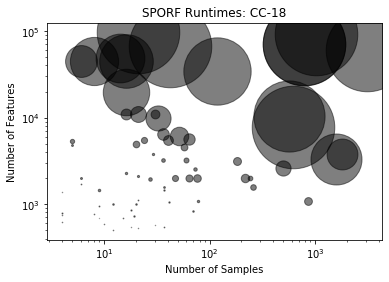

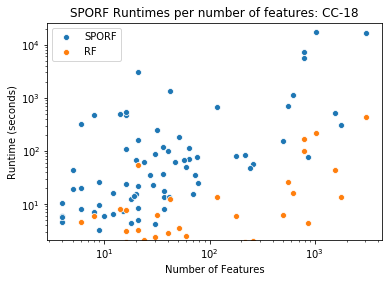

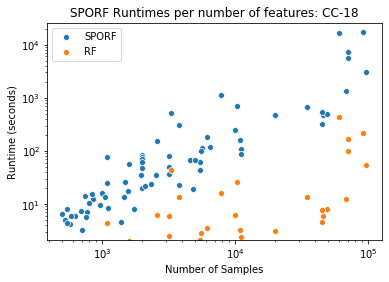

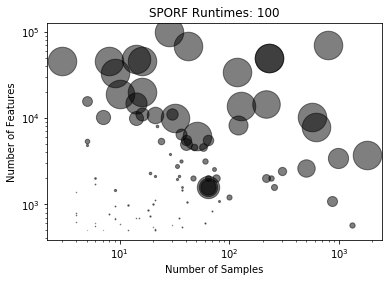

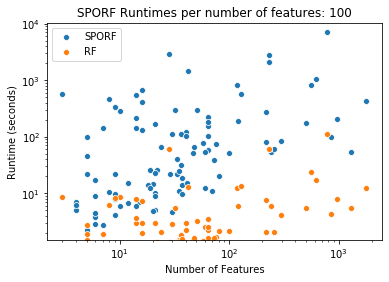

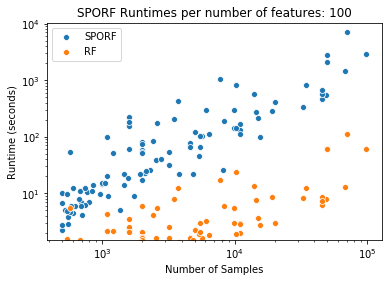

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

## OpenML CC18 runtimes

# SPORF times
hours = []
minutes = []
seconds = []
total_time = []
for time in SPORF_time_CC18:
    timefields = time.split(':')
    hours.append(timefields[0])
    minutes.append(timefields[1])
    seconds.append(float(timefields[2]))
    total_time.append(float(timefields[0])*3600 + float(timefields[1])*60 + float(timefields[2]))

n_features_SPORF_CC18 = []
n_samples_SPORF_CC18 = []

for i in range(len(SPORF_time_CC18)):
    n_features_SPORF_CC18.append(dimen_CC18[i][1])
    n_samples_SPORF_CC18.append(dimen_CC18[i][0])

n_features_SPORF_CC18 = np.vstack((n_features_SPORF_CC18, total_time))
n_samples_SPORF_CC18 = np.vstack((n_samples_SPORF_CC18, total_time))

# plot runtimes with marker sizes based on number of features and samples

b = np.mean(total_time)+1

for i in range(len(total_time)):
    if total_time[i] > (b):
        total_time[i] = b

plt.figure()
for i in range(len(SPORF_time_CC18)):
    plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'ko',MarkerSize = (total_time[i]/10),alpha=0.5)
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.title('SPORF Runtimes: CC-18')

# RF times
hours = []
minutes = []
seconds = []
total_time = []
for time in skRF_time_CC18:
    timefields = time.split(':')
    hours.append(timefields[0])
    minutes.append(timefields[1])
    seconds.append(float(timefields[2]))
    total_time.append(float(timefields[0])*3600 + float(timefields[1])*60 + float(timefields[2]))

n_features_RF_CC18 = []
n_samples_RF_CC18 = []

for i in range(len(SPORF_time_CC18)):
    n_features_RF_CC18.append(dimen_CC18[i][1])
    n_samples_RF_CC18.append(dimen_CC18[i][0])

n_features_RF_CC18 = np.vstack((n_features_RF_CC18, total_time))
n_samples_RF_CC18 = np.vstack((n_samples_RF_CC18, total_time))

# plot runtimes against number of features and number of samples separately

plt.figure()
sns.scatterplot(n_features_SPORF_CC18[:][0],n_features_SPORF_CC18[:][1])
sns.scatterplot(n_features_RF_CC18[:][0],n_features_RF_CC18[:][1])
plt.xlabel('Number of Features')
plt.ylabel('Runtime (seconds)')
plt.xscale('log')
plt.yscale('log')
plt.title('SPORF Runtimes per number of features: CC-18')
plt.legend(['SPORF','RF'])

plt.figure()
sns.scatterplot(n_samples_SPORF_CC18[:][0],n_samples_SPORF_CC18[:][1])
sns.scatterplot(n_samples_RF_CC18[:][0],n_samples_RF_CC18[:][1])
plt.xlabel('Number of Samples')
plt.ylabel('Runtime (seconds)')
plt.xscale('log')
plt.yscale('log')
plt.title('SPORF Runtimes per number of features: CC-18')
plt.legend(['SPORF','RF'])

## OpenML 100 runtimes

# SPORF times
hours = []
minutes = []
seconds = []
total_time = []
for time in SPORF_time_100:
    timefields = time.split(':')
    hours.append(timefields[0])
    minutes.append(timefields[1])
    seconds.append(float(timefields[2]))
    total_time.append(float(timefields[0])*3600 + float(timefields[1])*60 + float(timefields[2]))

n_features_SPORF_100 = []
n_samples_SPORF_100 = []

for i in range(len(SPORF_time_100)):
    n_features_SPORF_100.append(dimen_100[i][1])
    n_samples_SPORF_100.append(dimen_100[i][0])

n_features_SPORF_100 = np.vstack((n_features_SPORF_100, total_time))
n_samples_SPORF_100 = np.vstack((n_samples_SPORF_100, total_time))

# plot runtimes with marker sizes based on number of features and samples

b = np.mean(total_time)+1

for i in range(len(total_time)):
    if total_time[i] > (b):
        total_time[i] = b

plt.figure()
for i in range(len(SPORF_time_100)):
    plt.plot(dimen_100[i][1],dimen_100[i][0],'ko',MarkerSize = (total_time[i]/10),alpha=0.5)
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.title('SPORF Runtimes: 100')

# RF times
hours = []
minutes = []
seconds = []
total_time = []
for time in skRF_time_100:
    timefields = time.split(':')
    hours.append(timefields[0])
    minutes.append(timefields[1])
    seconds.append(float(timefields[2]))
    total_time.append(float(timefields[0])*3600 + float(timefields[1])*60 + float(timefields[2]))

n_features_RF_100 = []
n_samples_RF_100 = []

for i in range(len(SPORF_time_100)):
    n_features_RF_100.append(dimen_100[i][1])
    n_samples_RF_100.append(dimen_100[i][0])

n_features_RF_100 = np.vstack((n_features_RF_100, total_time))
n_samples_RF_100 = np.vstack((n_samples_RF_100, total_time))

# plot runtimes against number of features and number of samples separately

plt.figure()
sns.scatterplot(n_features_SPORF_100[:][0],n_features_SPORF_100[:][1])
sns.scatterplot(n_features_RF_100[:][0],n_features_RF_100[:][1])
plt.xlabel('Number of Features')
plt.ylabel('Runtime (seconds)')
plt.xscale('log')
plt.yscale('log')
plt.title('SPORF Runtimes per number of features: 100')
plt.legend(['SPORF','RF'])

plt.figure()
sns.scatterplot(n_samples_SPORF_100[:][0],n_samples_SPORF_100[:][1])
sns.scatterplot(n_samples_RF_100[:][0],n_samples_RF_100[:][1])
plt.xlabel('Number of Samples')
plt.ylabel('Runtime (seconds)')
plt.xscale('log')
plt.yscale('log')
plt.title('SPORF Runtimes per number of features: 100')
plt.legend(['SPORF','RF'])
